# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

* **Nama:** Wildan Mufid Ramadhan
* **Email:** wildan.20nov@gmail.com
* **Dicoding ID:** wildanmr

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

### Menyiapkan data yang akan digunakan

In [2]:
data = pd.read_csv("data/data.csv", delimiter=";")
data.columns = data.columns.str.replace(" ", "_").str.lower()

data.head(3)

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


## Data Understanding

Pada tahap ini, akan memahami struktur data, tipe data, dan memeriksa keberadaan missing values serta statistik deskriptif dari dataset.

In [3]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                4424 non-null   int64  
 1   application_mode                              4424 non-null   int64  
 2   application_order                             4424 non-null   int64  
 3   course                                        4424 non-null   int64  
 4   daytime_evening_attendance                    4424 non-null   int64  
 5   previous_qualification                        4424 non-null   int64  
 6   previous_qualification_grade                  4424 non-null   float64
 7   nacionality                                   4424 non-null   int64  
 8   mothers_qualification                         4424 non-null   int64  
 9   fathers_qualification                         442

In [4]:
print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_1st_sem_without_evaluations,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
print("Missing Values:")
data.isnull().sum()

Missing Values:


marital_status                                  0
application_mode                                0
application_order                               0
course                                          0
daytime_evening_attendance                      0
previous_qualification                          0
previous_qualification_grade                    0
nacionality                                     0
mothers_qualification                           0
fathers_qualification                           0
mothers_occupation                              0
fathers_occupation                              0
admission_grade                                 0
displaced                                       0
educational_special_needs                       0
debtor                                          0
tuition_fees_up_to_date                         0
gender                                          0
scholarship_holder                              0
age_at_enrollment                               0


### Hasil Data Understanding

- Dataset terdiri dari 4424 entri dan 37 kolom.
- Tidak ada missing values yang ditemukan di seluruh kolom.
- Kolom `status` adalah target variabel dengan tipe data `object` (kategorikal).
- Kolom lainnya memiliki tipe data numerik (`int64` dan `float64`) atau kategorikal yang perlu di-encode.
- Statistik deskriptif memberikan gambaran umum tentang distribusi nilai pada kolom numerik.

## Exploratory Data Analysis (EDA)

Pada bagian ini, akan melakukan analisis eksplorasi data untuk menemukan pola, anomali, dan hubungan antar variabel menggunakan visualisasi.

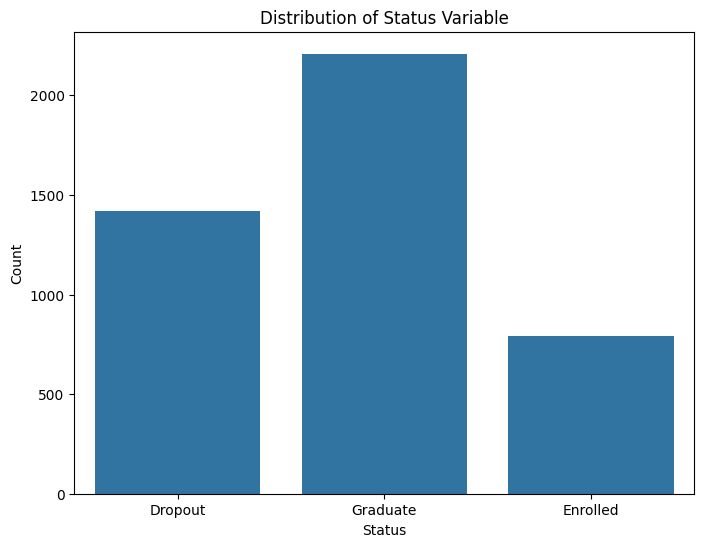

In [6]:
# Visualize the distribution of the target variable (Status)
plt.figure(figsize=(8, 6))
sns.countplot(x="status", data=data)
plt.title("Distribution of Status Variable")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

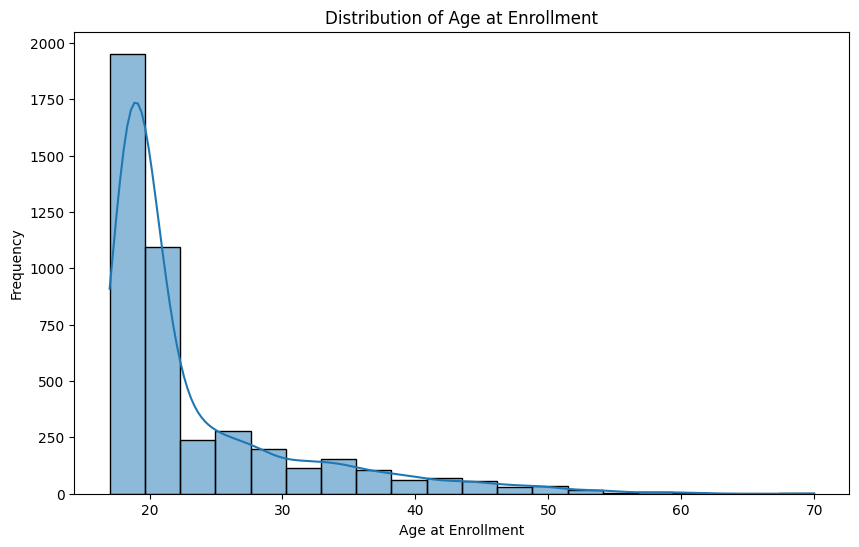

In [7]:
# Visualize the distribution of "age_at_enrollment"
plt.figure(figsize=(10, 6))
sns.histplot(data["age_at_enrollment"], bins=20, kde=True)
plt.title("Distribution of Age at Enrollment")
plt.xlabel("Age at Enrollment")
plt.ylabel("Frequency")
plt.show()

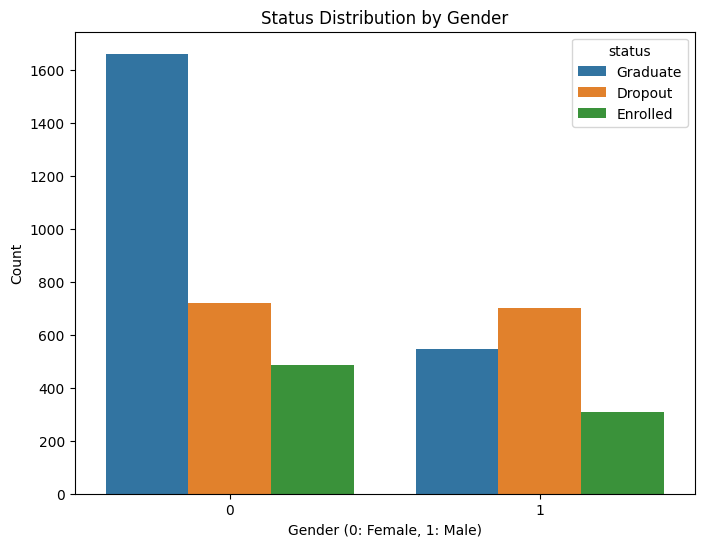

In [8]:
# Visualize the relationship between "gender" and "status"
plt.figure(figsize=(8, 6))
sns.countplot(x="gender", hue="status", data=data)
plt.title("Status Distribution by Gender")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Count")
plt.show()


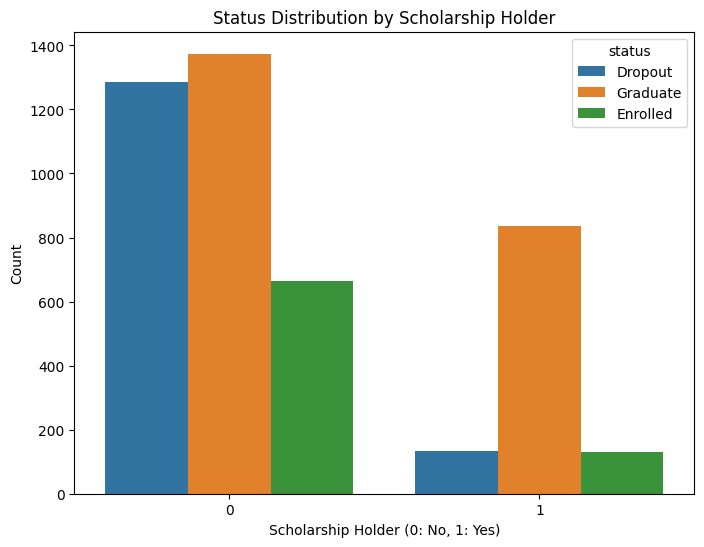

In [23]:
# Visualize the relationship between "scholarship_holder" and "status"
plt.figure(figsize=(8, 6))
sns.countplot(x="scholarship_holder", hue="status", data=data)
plt.title("Status Distribution by Scholarship Holder")
plt.xlabel("Scholarship Holder (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

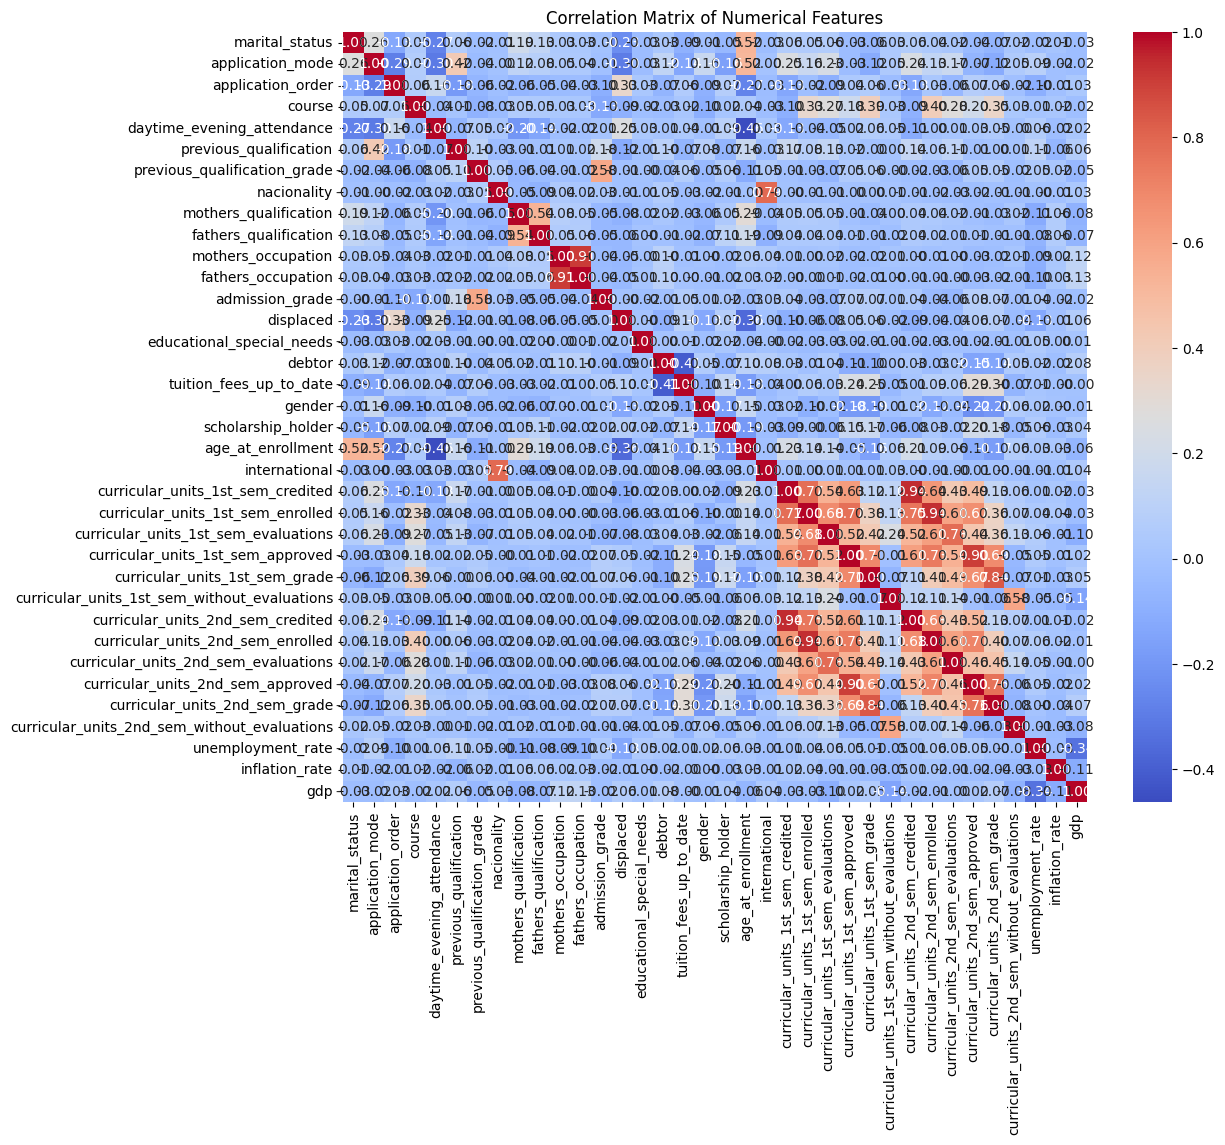

In [10]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Hasil EDA

- **Distribusi Status:** Terlihat bahwa jumlah siswa `Graduate` adalah yang terbanyak, diikuti oleh `Dropout`, dan `Enrolled`. Tingkat dropout yang tinggi (sekitar 32.1%) menjadi perhatian utama.
- **Distribusi Usia:** Mayoritas siswa mendaftar pada usia muda (18-22 tahun).
- **Gender vs Status:** Terlihat bahwa terdapat perbedaan mencolok dalam distribusi status antara gender. Data menunjukkan bahwa mahasiswa perempuan memiliki tingkat kelulusan yang jauh lebih tinggi dibandingkan dengan mahasiswa laki-laki, yang dapat mengindikasikan adanya pengaruh gender terhadap kemungkinan untuk lulus atau dropout.
- **Beasiswa vs Status:** Siswa yang menerima beasiswa cenderung memiliki tingkat kelulusan yang lebih tinggi dan tingkat dropout yang lebih rendah, menunjukkan pentingnya dukungan finansial.
- **Korelasi:** Matriks korelasi menunjukkan hubungan antar fitur numerik. Fitur-fitur terkait performa akademik (misalnya, `curricular_units_1st_sem_approved`, `curricular_units_1st_sem_grade`) kemungkinan besar berkorelasi kuat dengan status siswa.

## Data Preparation / Preprocessing

Tahap ini melibatkan persiapan data untuk modeling, termasuk encoding variabel kategorikal dan scaling variabel numerik.

In [11]:
# Separate features (X) and target (y)
X = data.drop("status", axis=1)
y = data["status"]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (4424, 36)
y shape: (4424,)


In [12]:
# Encode categorical target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [13]:
# Identify categorical and numerical features
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [14]:
# Apply One-Hot Encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [15]:
# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

### Hasil Preprocessing

- Variabel target (`status`) telah di-encode menjadi representasi numerik.
- Variabel kategorikal telah diubah menjadi format numerik menggunakan One-Hot Encoding.
- Variabel numerik telah di-scaling menggunakan StandardScaler untuk menormalkan rentang nilai.
- Data telah dibagi menjadi training set (80%) dan testing set (20%) untuk melatih dan mengevaluasi model.

## Modeling

Pada tahap ini, akan melatih model Machine Learning untuk memprediksi status siswa. Kita akan menggunakan Random Forest Classifier.

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model and label encoder
joblib.dump(model, "model/random_forest_model.pkl")
joblib.dump(le, "model/label_encoder.pkl")
joblib.dump(scaler, "model/scaler.pkl")
print("Model, Label Encoder, and Scaler saved successfully.")

Model, Label Encoder, and Scaler saved successfully.


### Hasil Modeling

- Model Random Forest Classifier telah berhasil dilatih menggunakan training data.
- Model, Label Encoder, dan Scaler telah disimpan dalam format `.pkl` untuk penggunaan di masa mendatang (inference).

## Evaluation

Pada tahap evaluasi, kita akan mengukur performa model menggunakan metrik seperti akurasi, classification report, dan confusion matrix.

In [18]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7593220338983051
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.77      0.81       316
    Enrolled       0.49      0.29      0.37       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885

Confusion Matrix:
[[244  21  51]
 [ 36  44  71]
 [  9  25 384]]


### Hasil Evaluasi

- **Akurasi Keseluruhan:** Model mencapai akurasi sekitar 75.93% pada data testing.
- **Classification Report:**
  - **Dropout:** Model menunjukkan performa yang baik dalam memprediksi siswa dropout (precision 0.84, recall 0.77, f1-score 0.81). Ini sangat penting untuk tujuan deteksi dini.
  - **Graduate:** Model sangat baik dalam memprediksi siswa yang akan lulus (precision 0.76, recall 0.92, f1-score 0.83). Recall yang tinggi menunjukkan model berhasil mengidentifikasi sebagian besar siswa yang akan lulus.
  - **Enrolled:** Performa model paling rendah untuk kelas `Enrolled` (precision 0.49, recall 0.29, f1-score 0.37). Hal ini mungkin karena kelas ini merupakan status transisi dan lebih sulit diprediksi secara definitif.
- **Confusion Matrix:**
  - Menunjukkan bahwa model memiliki kecenderungan untuk salah mengklasifikasikan siswa `Enrolled` sebagai `Dropout` atau `Graduate`, yang sesuai dengan rendahnya recall untuk kelas `Enrolled`.

Secara keseluruhan, model ini cukup efektif untuk tujuan deteksi dini siswa berisiko dropout, terutama dengan performa yang kuat pada kelas `Dropout` dan `Graduate`.